In [148]:
# importings
import os
import numpy as np
!pip3 install pandas
import pandas as pd

!pip3 install scikit-learn
import sklearn

!pip3 install torch torchvision torchaudio
!pip3 install sentence_transformers
from sentence_transformers import SentenceTransformer

!pip3 install cython
!pip3 install hdbscan --no-build-isolation --no-binary :all:

!pip3 install scipy
import hdbscan

!pip3 install umap-learn
import umap

!pip3 install matplotlib
import matplotlib.pyplot as plt

!pip3 install -q openpyxl



!pip3 install opencv-python
import cv2


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid 

In [56]:
home_dir = "/Users/rintrin/codes/ct_gpu_test/"
excel_file_pth = os.path.join(home_dir, "data/TracxnExport-Companies-tagv1-2010-2014.xlsx")
# df = pd.read_excel(excel_file_pth)
xls_all = pd.ExcelFile(excel_file_pth)
print(xls_all.sheet_names)

"""
['Index', 'Companies Covered 1.1', '1.2', '1.3', '1.4', 'Funding Rounds 2.1', '2.2', 'Acquisitions 3.1', 'IPOs 4.1', 'Leaderboard 5.1', 'Soonicorn Club 6.1', 'People 7.1', '7.2', '7.3', '7.4', 'Platform View 8.1', 'Disclaimer']
"""



['Index', 'Companies Covered 1.1', '1.2', '1.3', '1.4', 'Funding Rounds 2.1', '2.2', 'Acquisitions 3.1', 'IPOs 4.1', 'Leaderboard 5.1', 'Soonicorn Club 6.1', 'People 7.1', '7.2', '7.3', '7.4', 'Platform View 8.1', 'Disclaimer']


"\n['Index', 'Companies Covered 1.1', '1.2', '1.3', '1.4', 'Funding Rounds 2.1', '2.2', 'Acquisitions 3.1', 'IPOs 4.1', 'Leaderboard 5.1', 'Soonicorn Club 6.1', 'People 7.1', '7.2', '7.3', '7.4', 'Platform View 8.1', 'Disclaimer']\n"

In [135]:

# dfs = {}
# for sheet_name in ['Companies Covered 1.1', '1.2', '1.3', '1.4']:
#     each_df = pd.read_excel(xls_all, sheet_name=sheet_name)
#     dfs[sheet_name] = each_df.drop(labels=range(5), axis=0)
# dfs["1.2"].head()
sheet_name = 'Companies Covered 1.1'
df_all = pd.read_excel(xls_all, sheet_name=sheet_name)
df = df_all.drop(labels=range(4), axis=0)
# print(df.head())
cols = df.iloc[0]
df = df.rename(columns=cols)
df = df.drop(labels=[4], axis=0)
df = df.reset_index(drop=True)
df.head()

df_overview_all = df.loc[:, ["SNo.","Company Name", "Overview"]]
df_description_all = df.loc[:, ["SNo.","Company Name", "Description"]]

df_overview = df_overview_all["Overview"]
df_description = df_description_all["Description"]
df_description.head()
print([0])

[0]


In [136]:
# from sklearn.datasets import fetch_20newsgroups
# data = fetch_20newsgroups(subset='all')['data']

print(df_description.describe())
# print("null description : ", sum(df_description.isnull().all()))
print("empty description : ", len(list(df_description[df_description==""])))


# for index, row in df_description.iterrows():
#     print("aaa", row)
#     if row == "nan":
#         df_description.loc[index] = df_overview.loc[index]

data_description = list(df_description)
data_overview = list(df_overview)

float_num = 0
for idx, d in enumerate(data_description):
    if type(d) == str:
        pass
    else:
        # print(d)
        # print(type(d))
        if type(data_overview[idx]) == str:
            data_description[idx] = data_overview[idx]
        else:
            data_description[idx] = ""

        float_num+=1
        # print("\n")
print(float_num)


print(data_description[:3])

# print(type(data))
# for i in  range(5):
#     print(data[i])
#     print("\n")

count                                                  2234
unique                                                 2234
top       Provider of microbe-based plant protection pro...
freq                                                      1
Name: Description, dtype: object
empty description :  0
76
['Provider of microbe-based plant protection products. It develops technology to improve yield potential, increase milling quality, and protect plants against environmental stresses. It also offers an online marketplace to buy and sell grains, certified crops, and agrochemicals. It offers microbiome treatment, support to optimize regenerative practices, and grain quality testing services for crop growers.', 'Developer of electric scooters. The company is involved in the design and development of electric scooters that include BLDC motors, fast charging, Li-ion batteries, water and dust resistance, multiple riding modes, mono-shock suspensions, front and rear disc brakes, reverse mode, interac

Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[ -1  11  -1 ... 102   0  48]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 19 27 ... -1  4 75]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[37 39 27 ... -1  0 71]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 27 32 ... -1  0 44]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 15 24 ... -1  0 43]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[53 25 22 ... 55  0 50]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1  9 15 ... 52  0 11]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1  9  8 ... -1  0 22]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 10  8 ... 46  0 35]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 14  7 ... -1  0 34]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 26 14 ... -1  0 37]


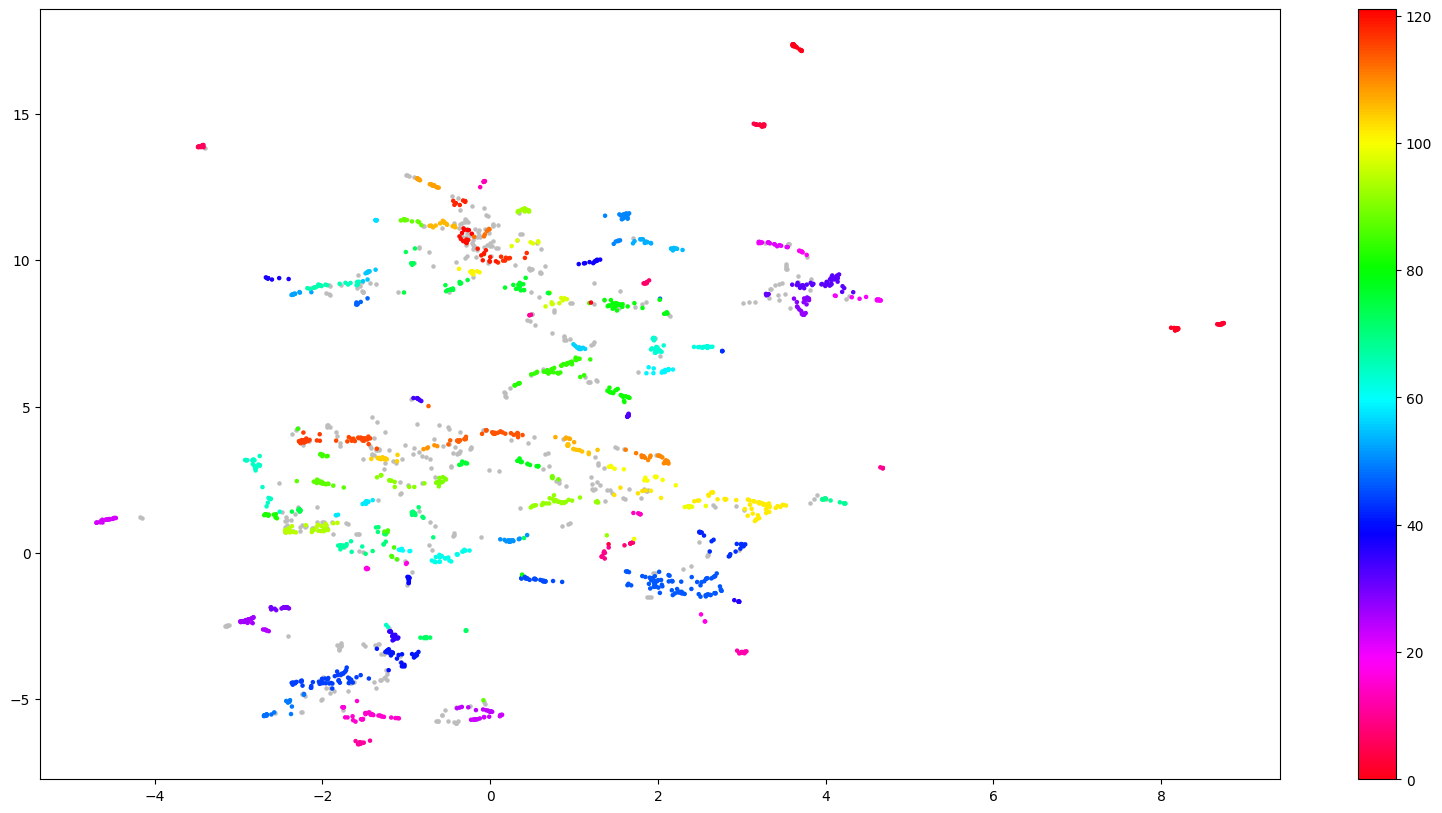

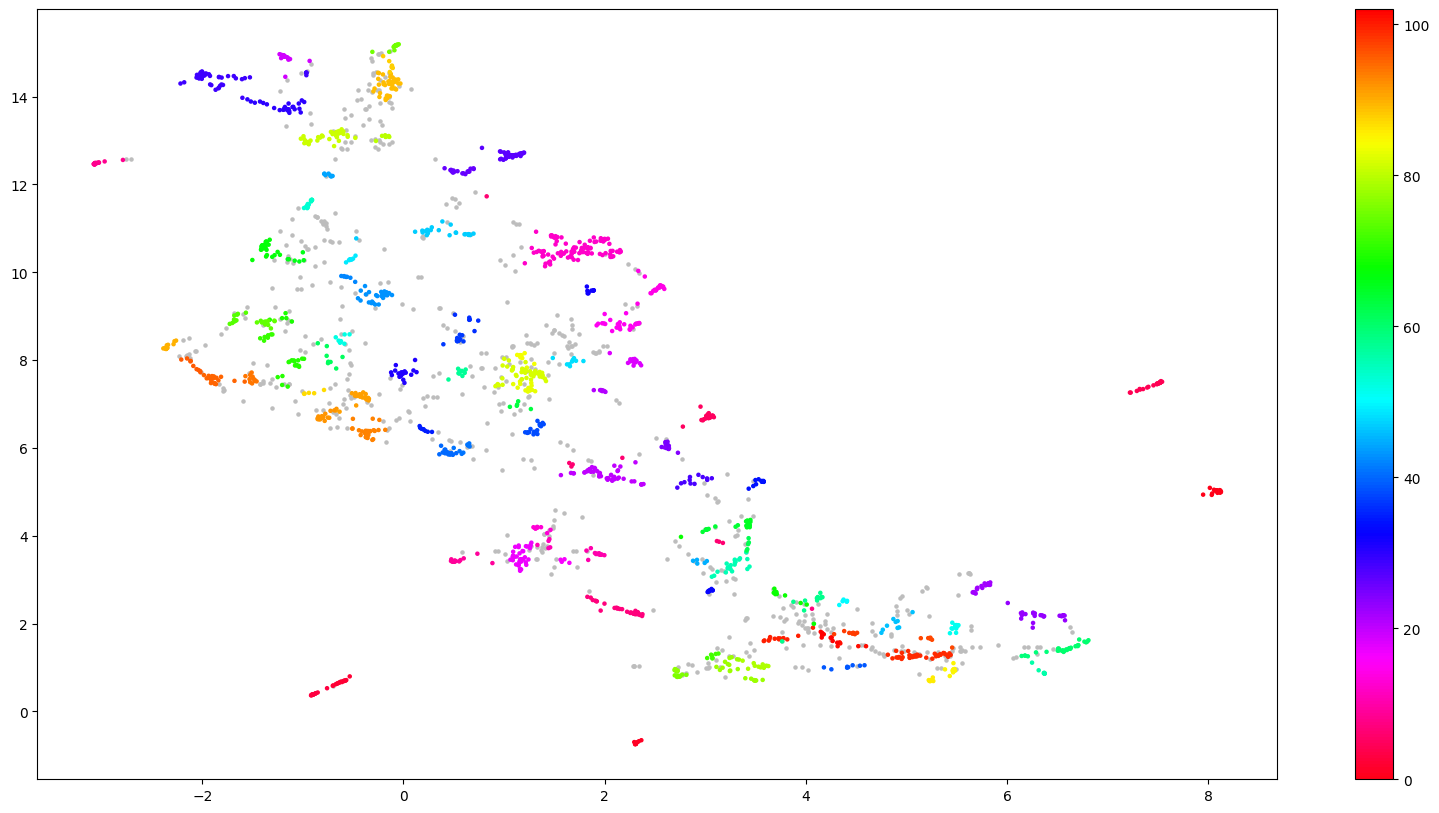

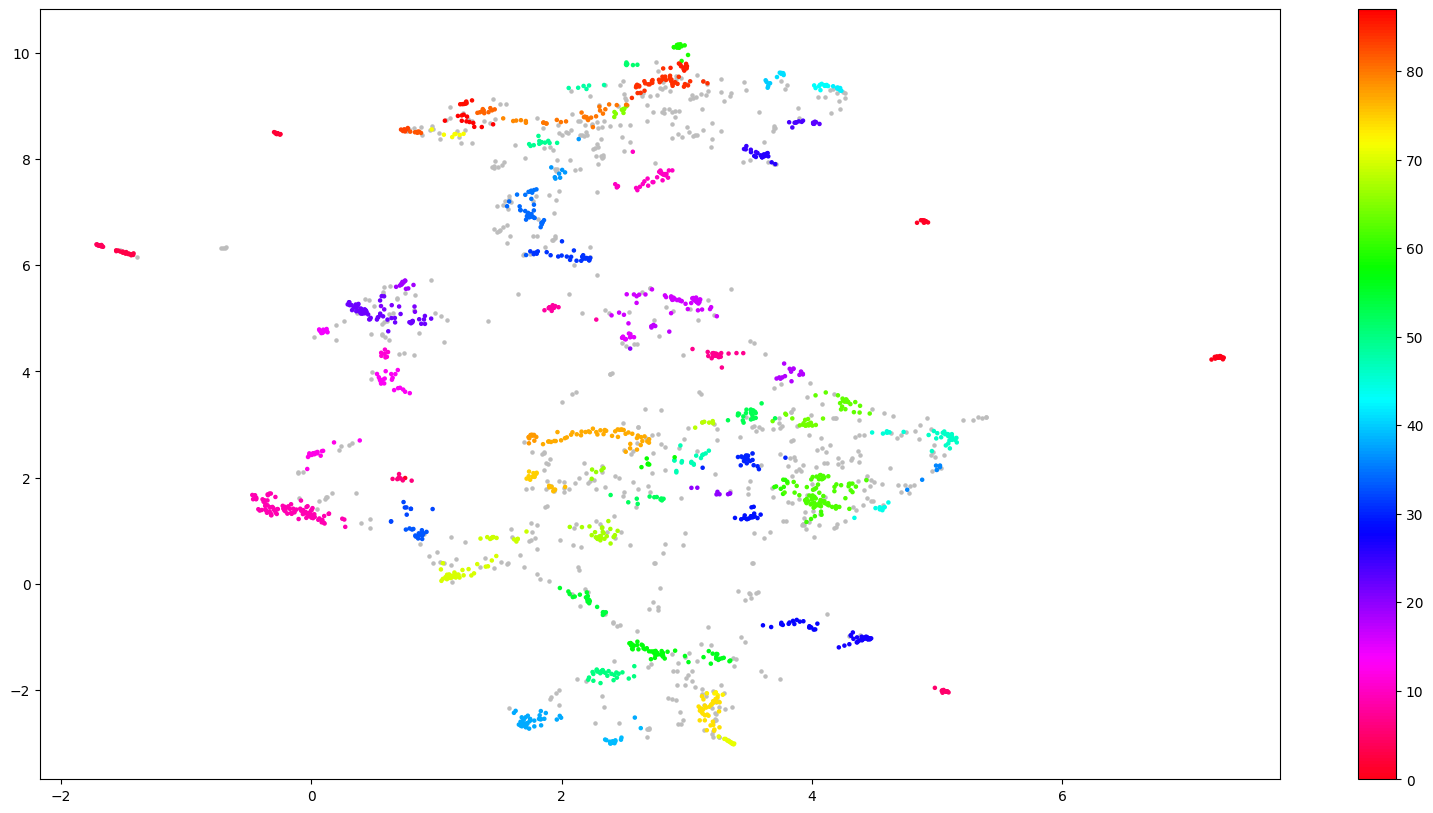

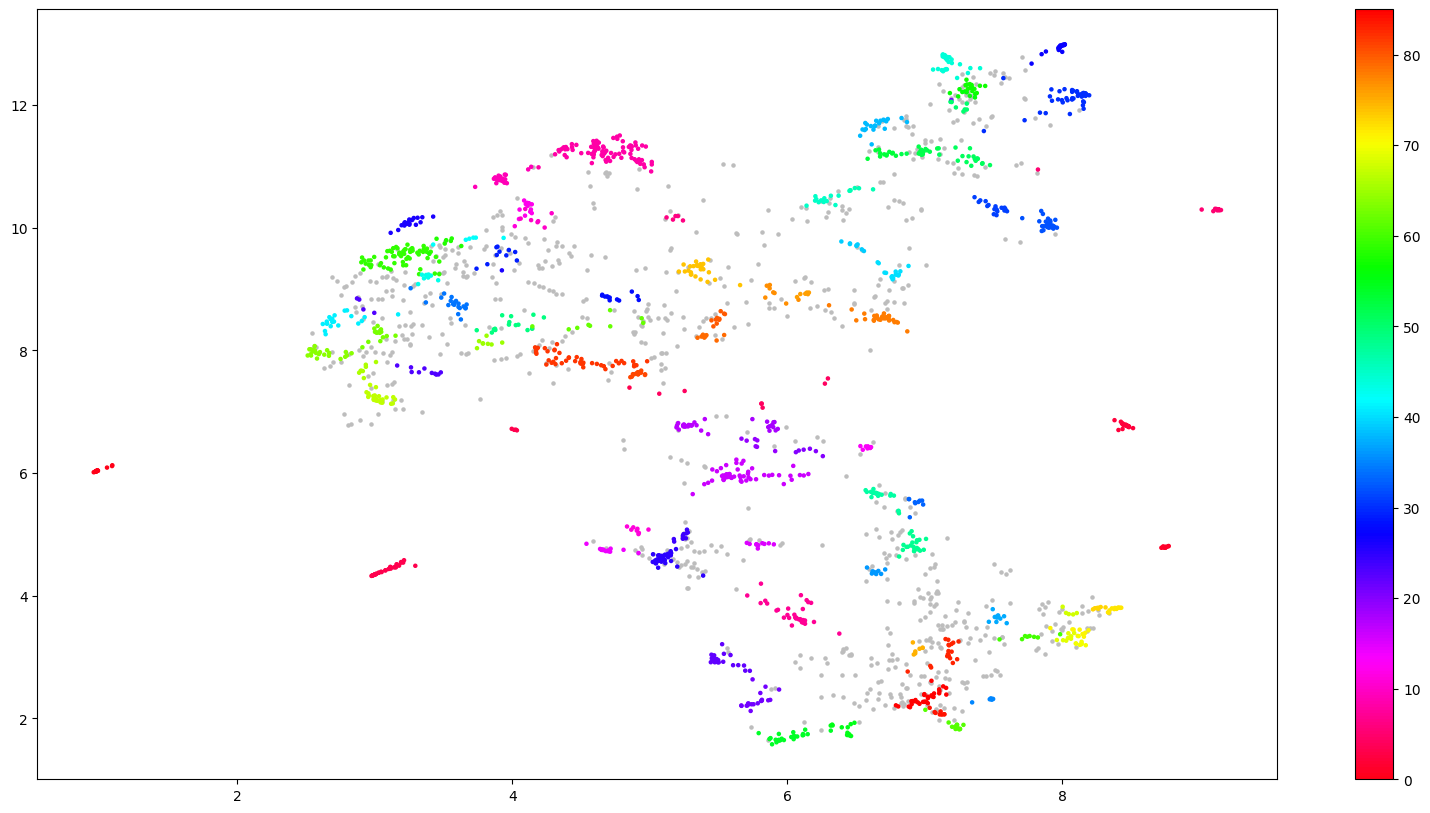

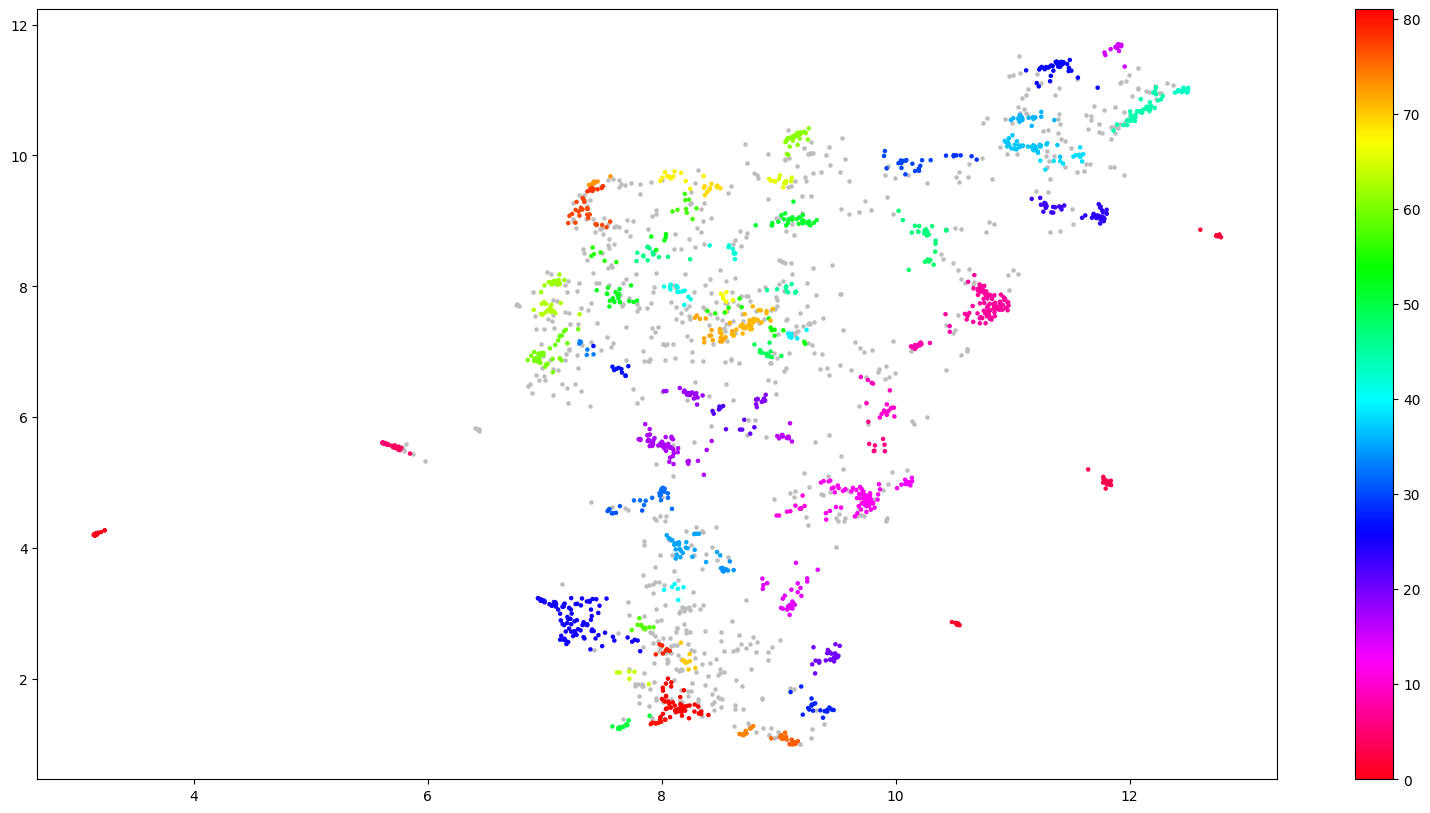

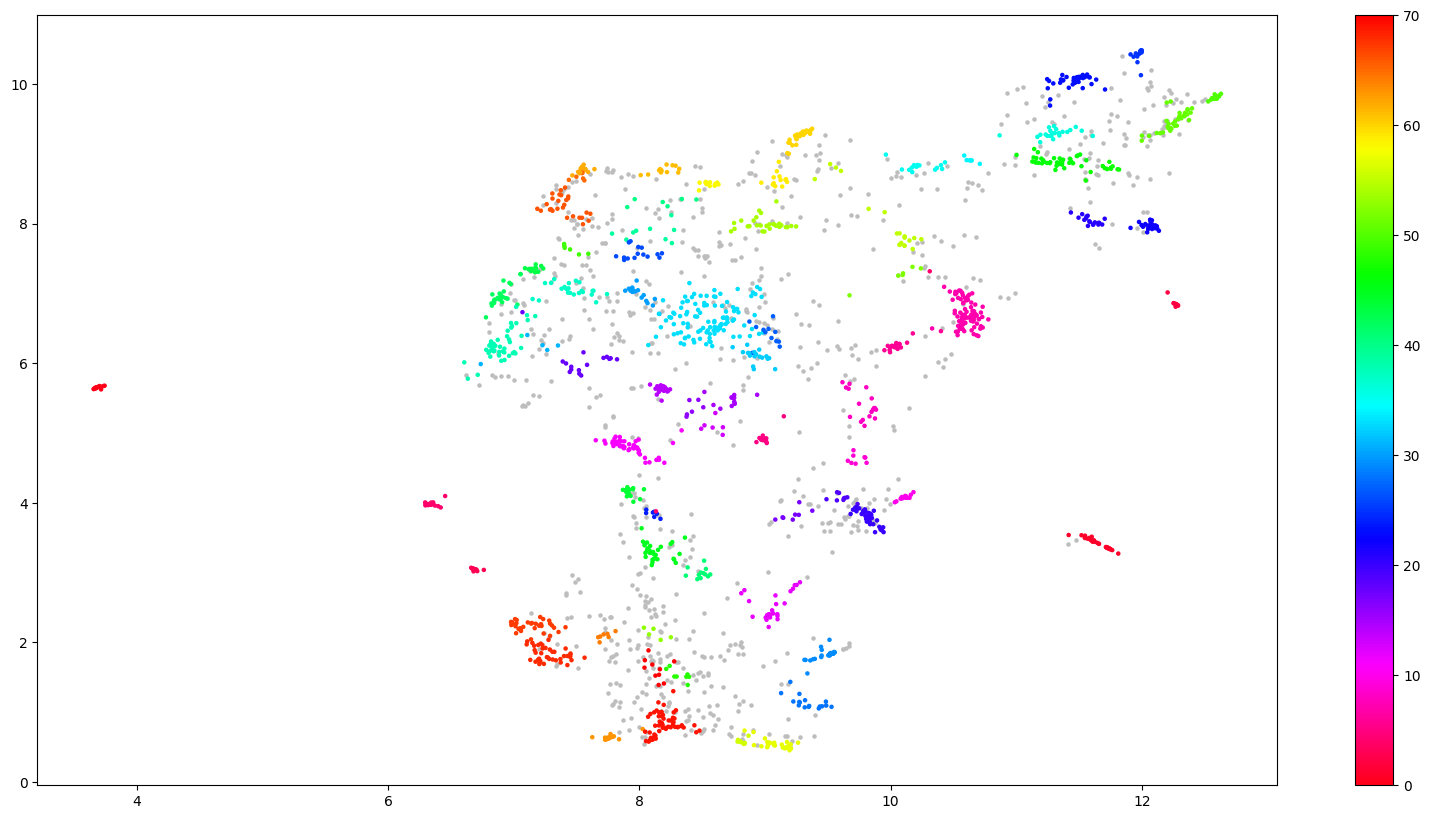

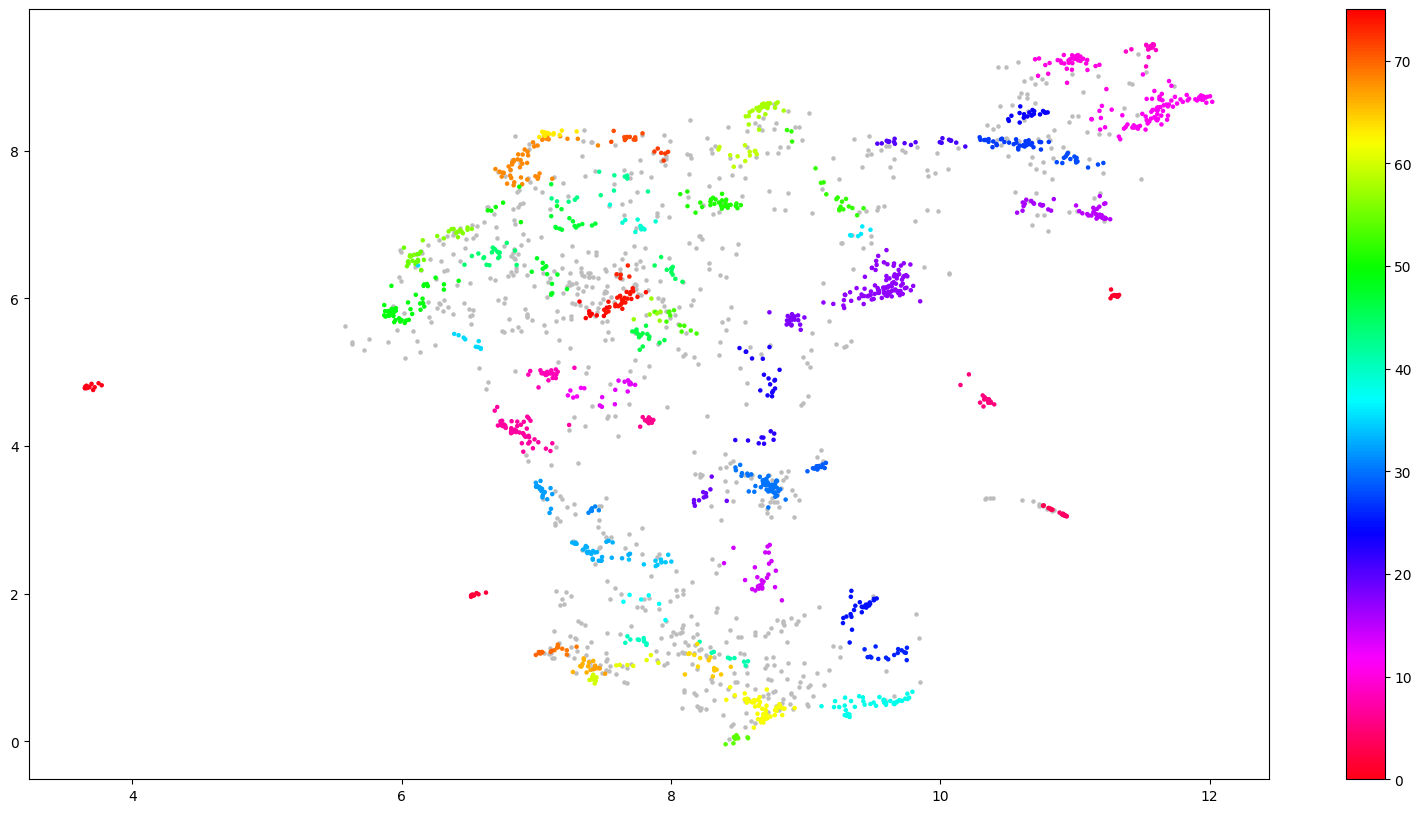

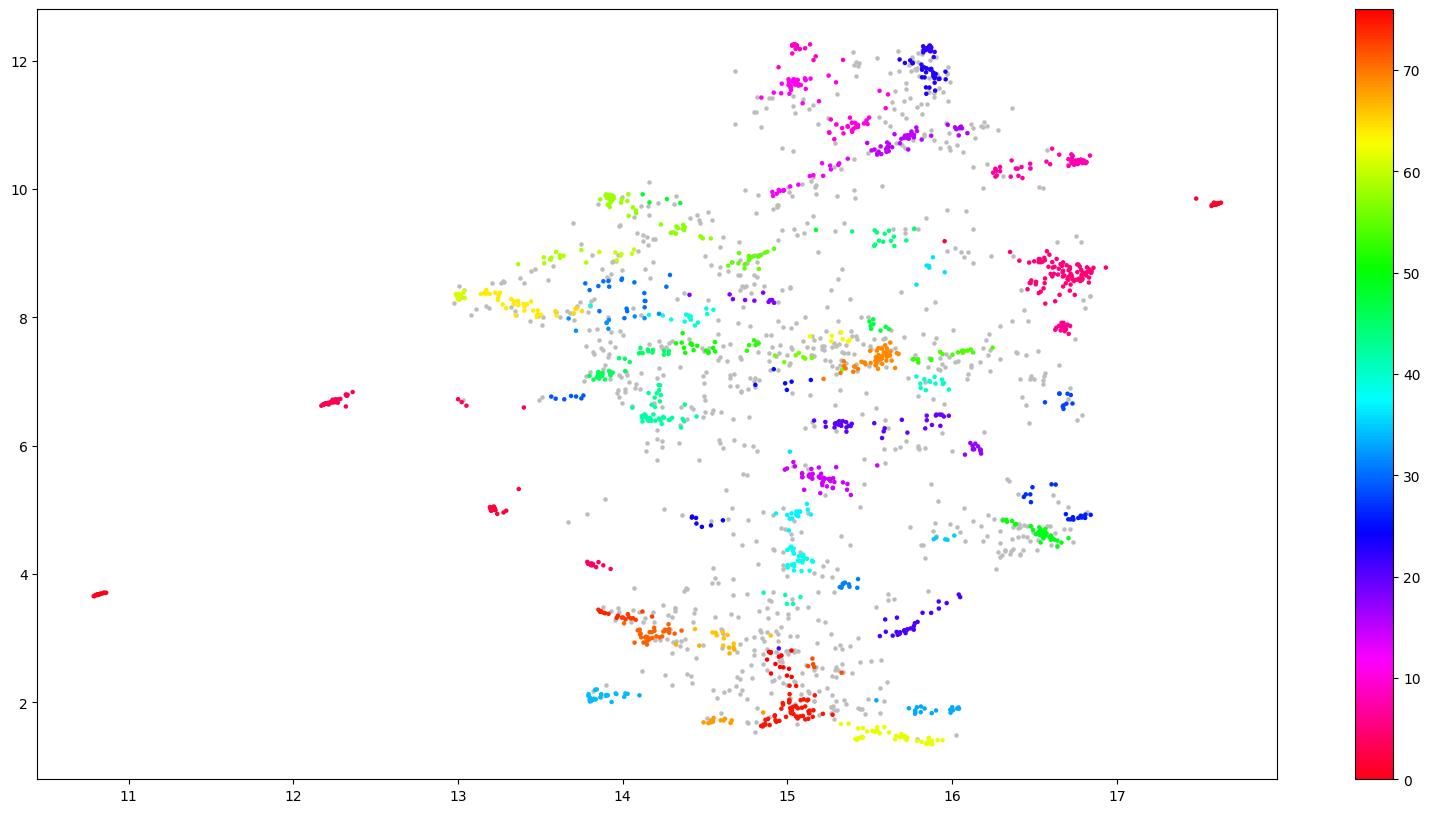

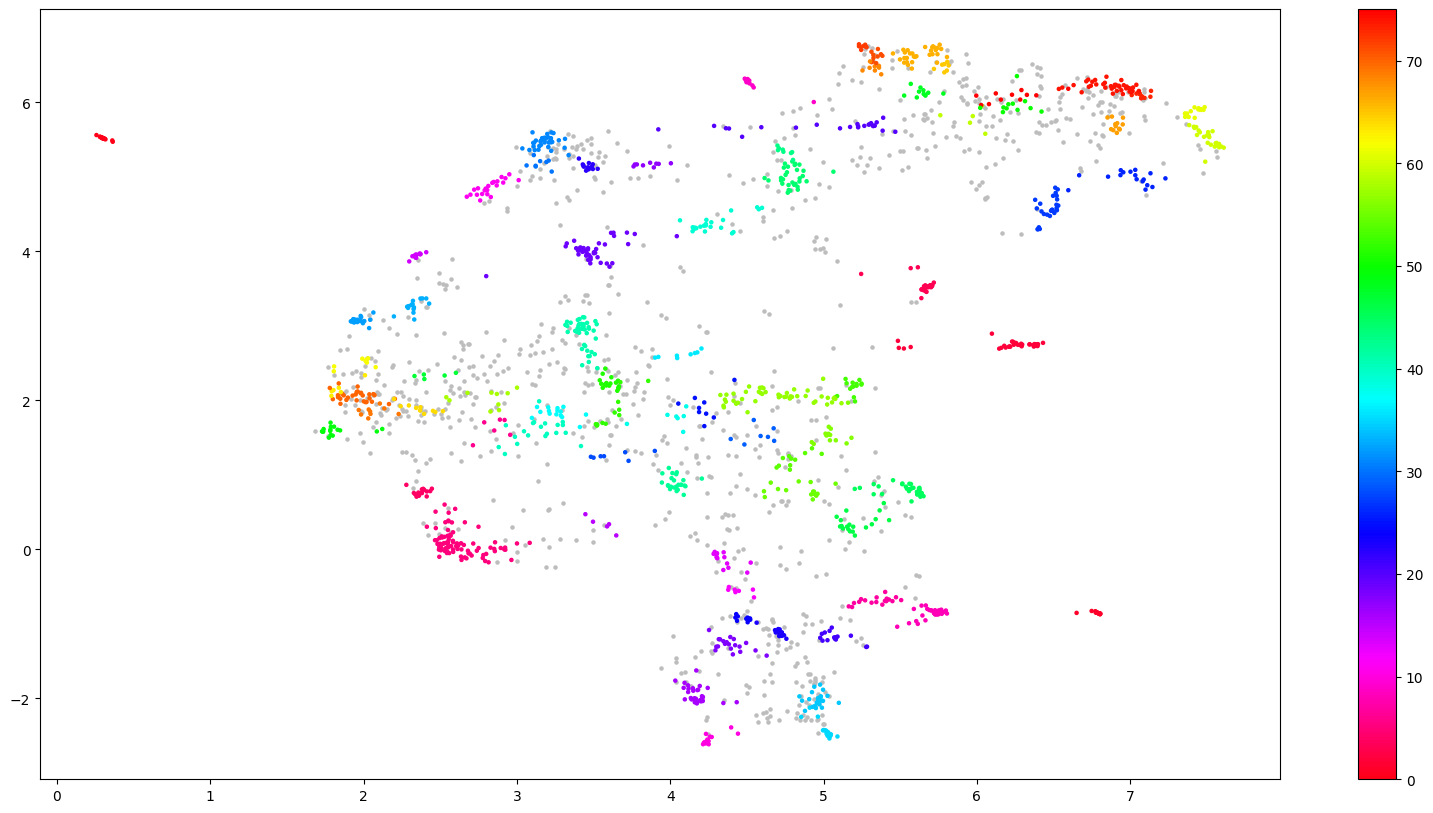

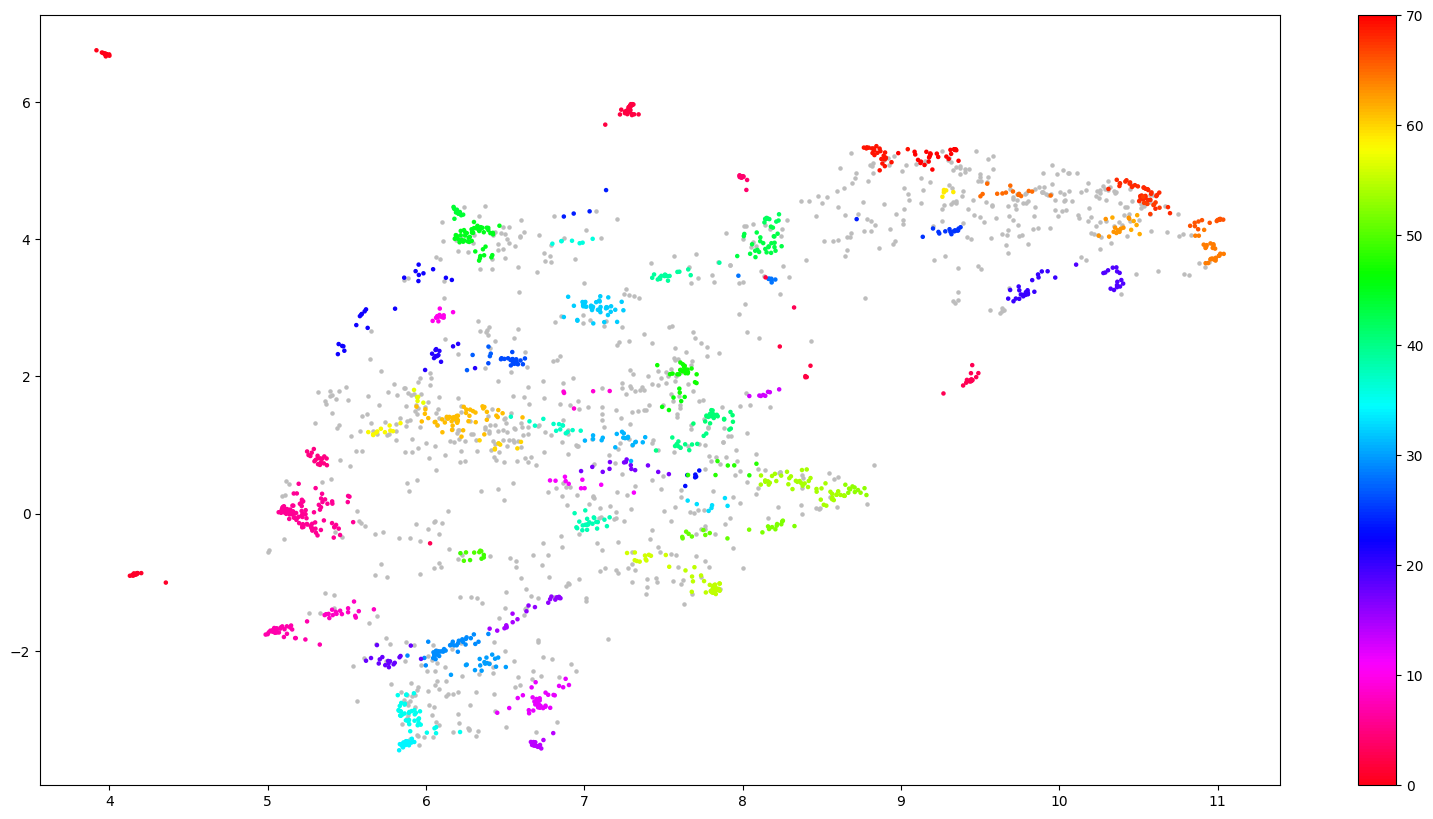

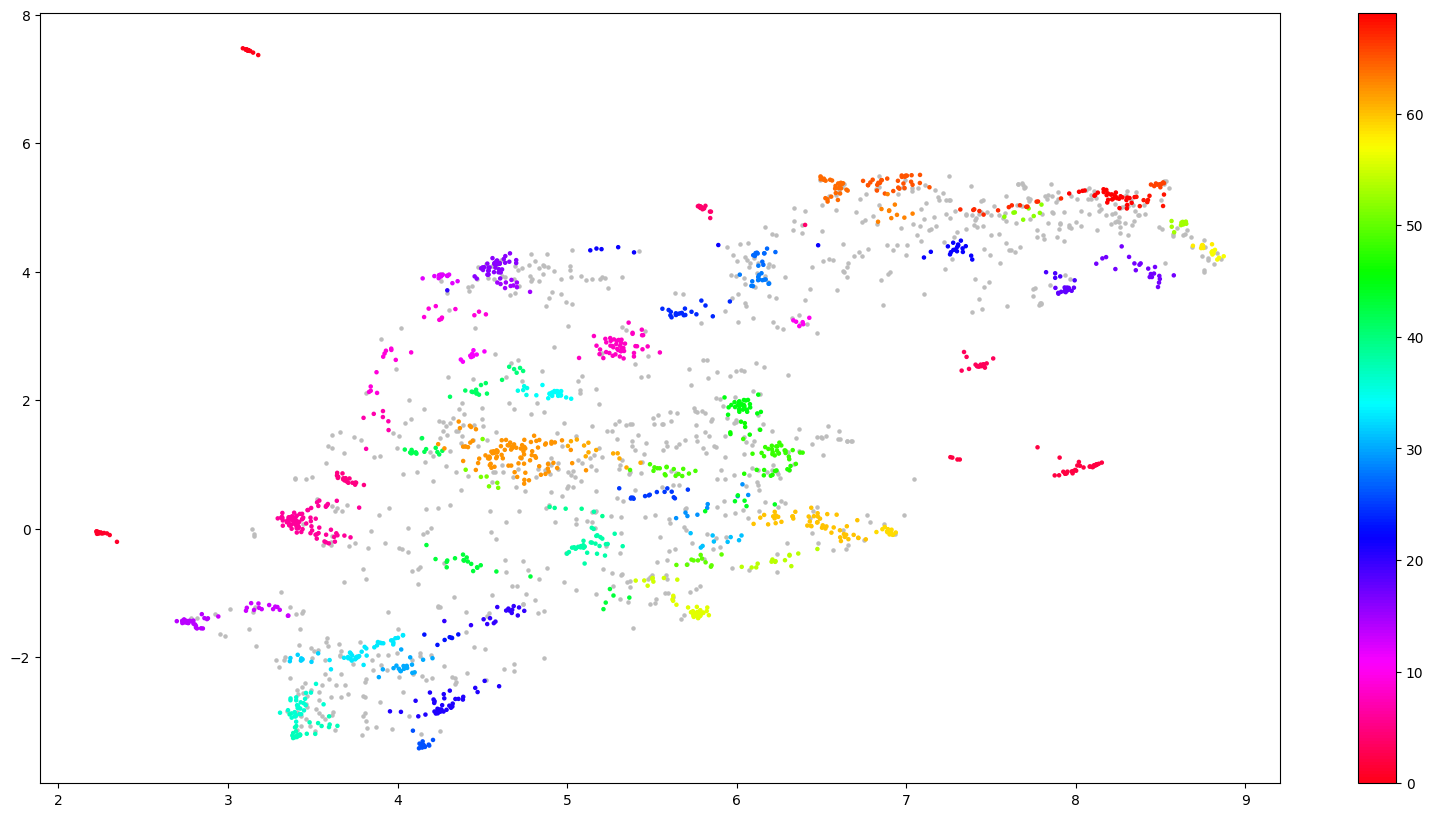

In [157]:
for umap_num in [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    use_data = "Overview"
    if use_data == "Overview":
        embeddings = model.encode(data_overview, show_progress_bar=True)
    else:
        embeddings = model.encode(data_description, show_progress_bar=True)
        
    # embeddings = model.encode(data_description, show_progress_bar=True)

    nn = umap_num
    nc = 5
    umap_embeddings = umap.UMAP(n_neighbors=nn, 
                                n_components=nc, 
                                metric='cosine').fit_transform(embeddings)
    cluster = hdbscan.HDBSCAN(min_cluster_size=5,metric='euclidean',cluster_selection_method='eom').fit(umap_embeddings)


    # Prepare data
    umap_data = umap.UMAP(n_neighbors=nn, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = cluster.labels_
    print(cluster.labels_)

    # Visualize clusters
    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    size = 5.0
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=size)
    # plt.scatter(clustered.x, clustered.y, c= s=0.05, cmap='hsv_r')
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=size, cmap='hsv_r')
    plt.colorbar()


    buf, size = fig.canvas.print_to_buffer()
    img_arr = np.frombuffer(buf, dtype=np.uint8).reshape(size[1], size[0], -1)
    table = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2BGR)
    img_path = os.path.join(home_dir, f"data/cluster_imgs/{use_data}_umap_nn{nn}_nc{nc}.png")
    if os.path.exists(img_path):
        pass
    else:
        cv2.imwrite(img_path, table)

    # def make_table(self, fig, x_list, y_dic, frame_num):
    #     ax = fig.add_subplot(1, 1, 1)
    #     for clr in self.use_color:
    #         ax.plot(x_list, y_dic[clr], color=self.plot_color_dic[clr], label=clr)
    #         ax.scatter(frame_num, y_dic[clr][-1], c=self.plot_color_dic[clr])
    #     ax.legend(loc=0)
    #     buf, size = fig.canvas.print_to_buffer()
    #     # print('size is : ',size)
    #     img_arr = np.frombuffer(buf, dtype=np.uint8).reshape(size[1], size[0], -1)
    #     table = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2BGR)
    #     return table